In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
path20="/content/drive/My Drive/bitsproj/HDFCBANK.NS.csv"
path19="/content/drive/My Drive/bitsproj/HDFCBANK.NS19.csv"

In [3]:
df20 = pd.read_csv(path20)
df19 = pd.read_csv(path19)

In [4]:
df20.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,1035.0,1037.000000,995.000000,999.500000,999.500000,15993161
1,2020-03-17,1008.0,1010.000000,954.700012,975.099976,975.099976,21338419
2,2020-03-18,985.0,993.000000,865.000000,876.900024,876.900024,30590703
3,2020-03-19,847.0,919.950012,795.000000,895.549988,895.549988,33610024
4,2020-03-20,875.0,914.599976,824.549988,882.849976,882.849976,44318732


In [5]:
df19.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-15,1115.500000,1129.949951,1114.030029,1126.500000,1117.055542,6381544
1,2019-03-18,1130.949951,1145.819946,1123.500000,1130.719971,1121.240112,7179360
2,2019-03-19,1134.750000,1137.949951,1125.500000,1133.880005,1124.373657,5978996
3,2019-03-20,1134.500000,1150.000000,1130.530029,1149.500000,1139.862671,5855996
4,2019-03-22,1150.000000,1153.500000,1135.400024,1138.069946,1128.528442,15201940


In [6]:
df19.shape

(139, 7)

In [7]:
df20.shape

(146, 7)

In [8]:
df19['newda'] = [df19['Date'][i][5:] for i in range(139)]
df20['newda'] = [df20['Date'][i][5:] for i in range(146)]
df19.head()

,Date,Open,High,Low,Close,Adj Close,Volume,newda
0,2019-03-15,1115.500000,1129.949951,1114.030029,1126.500000,1117.055542,6381544,03-15
1,2019-03-18,1130.949951,1145.819946,1123.500000,1130.719971,1121.240112,7179360,03-18
2,2019-03-19,1134.750000,1137.949951,1125.500000,1133.880005,1124.373657,5978996,03-19
3,2019-03-20,1134.500000,1150.000000,1130.530029,1149.500000,1139.862671,5855996,03-20
4,2019-03-22,1150.000000,1153.500000,1135.400024,1138.069946,1128.528442,15201940,03-22


In [9]:
df_in = pd.merge(df19,df20,on='newda',how='inner')
df_in.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,newda,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2019-03-18,1130.949951,1145.819946,1123.500000,1130.719971,1121.240112,7179360,03-18,2020-03-18,985.000000,993.000000,865.000000,876.900024,876.900024,30590703
1,2019-03-19,1134.750000,1137.949951,1125.500000,1133.880005,1124.373657,5978996,03-19,2020-03-19,847.000000,919.950012,795.000000,895.549988,895.549988,33610024
2,2019-03-20,1134.500000,1150.000000,1130.530029,1149.500000,1139.862671,5855996,03-20,2020-03-20,875.000000,914.599976,824.549988,882.849976,882.849976,44318732
3,2019-03-25,1130.000000,1143.930054,1126.500000,1140.650024,1131.086914,4599630,03-25,2020-03-25,770.450012,867.450012,755.250000,856.750000,856.750000,23614021
4,2019-03-26,1137.949951,1157.500000,1136.300049,1155.680054,1145.990845,5893424,03-26,2020-03-26,870.099976,937.700012,841.000000,901.099976,901.099976,28521578


In [10]:
ndf19=pd.DataFrame(df_in,columns=['Date_x','Open_x','High_x',	'Low_x','Close_x','Adj Close_x','Volume_x'])
ndf19.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x
0,2019-03-18,1130.949951,1145.819946,1123.500000,1130.719971,1121.240112,7179360
1,2019-03-19,1134.750000,1137.949951,1125.500000,1133.880005,1124.373657,5978996
2,2019-03-20,1134.500000,1150.000000,1130.530029,1149.500000,1139.862671,5855996
3,2019-03-25,1130.000000,1143.930054,1126.500000,1140.650024,1131.086914,4599630
4,2019-03-26,1137.949951,1157.500000,1136.300049,1155.680054,1145.990845,5893424


In [11]:
ndf20=pd.DataFrame(df_in,columns=['Date_y','Open_y','High_y',	'Low_y','Close_y','Adj Close_y','Volume_y'])
ndf20.head()

,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2020-03-18,985.000000,993.000000,865.000000,876.900024,876.900024,30590703
1,2020-03-19,847.000000,919.950012,795.000000,895.549988,895.549988,33610024
2,2020-03-20,875.000000,914.599976,824.549988,882.849976,882.849976,44318732
3,2020-03-25,770.450012,867.450012,755.250000,856.750000,856.750000,23614021
4,2020-03-26,870.099976,937.700012,841.000000,901.099976,901.099976,28521578


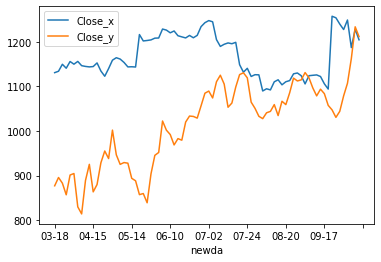

In [12]:
df_in.plot(x='newda',y=["Close_x","Close_y"])


In [13]:
daily_close19 = df_in[["Adj Close_x"]]
daily_log_returns19 = np.log(daily_close19.pct_change()+1)
daily_log_returns19.fillna(0, inplace=True)
print(daily_log_returns19)
daily_close20 = df_in[["Adj Close_y"]]
daily_log_returns20 = np.log(daily_close20.pct_change()+1)
daily_log_returns20.fillna(0, inplace=True)
print(daily_log_returns20)

    Adj Close_x
0      0.000000
1      0.002791
2      0.013682
3     -0.007729
4      0.013091
..          ...
75    -0.009931
76     0.017244
77    -0.050838
78     0.034164
79    -0.019527

[80 rows x 1 columns]
    Adj Close_y
0      0.000000
1      0.021045
2     -0.014283
3     -0.030009
4      0.050470
..          ...
75     0.032604
76     0.025945
77     0.048749
78     0.059538
79    -0.018037

[80 rows x 1 columns]


In [14]:
daily_pct_change19 = daily_close19 / daily_close19.shift(1) - 1
daily_pct_change19.fillna(0, inplace=True)
print(daily_pct_change19)
daily_pct_change20 = daily_close20 / daily_close20.shift(1) - 1
daily_pct_change20.fillna(0, inplace=True)
print(daily_pct_change20)

    Adj Close_x
0      0.000000
1      0.002795
2      0.013776
3     -0.007699
4      0.013177
..          ...
75    -0.009881
76     0.017394
77    -0.049568
78     0.034754
79    -0.019338

[80 rows x 1 columns]
    Adj Close_y
0      0.000000
1      0.021268
2     -0.014181
3     -0.029563
4      0.051765
..          ...
75     0.033142
76     0.026284
77     0.049957
78     0.061347
79    -0.017875

[80 rows x 1 columns]


In [15]:
daily_pct_change19.describe()

,Adj Close_x
count,80.000000
mean,0.001128
std,0.022322
min,-0.049568
25%,-0.007833
50%,0.000298
75%,0.004544
max,0.149349


In [16]:
daily_pct_change20.describe()

,Adj Close_y
count,80.000000
mean,0.004556
std,0.032175
min,-0.082702
25%,-0.016457
50%,0.002508
75%,0.025621
max,0.092216


In [17]:
daily_pct_changen19 = daily_pct_change19.to_numpy()
daily_pct_changen20 = daily_pct_change20.to_numpy()

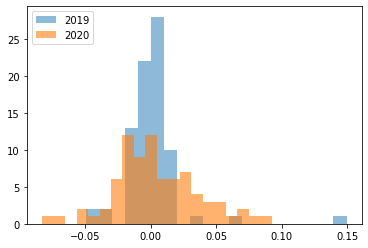

In [18]:
plt.hist(daily_pct_changen19,bins=20,label='2019',alpha=0.5)
plt.hist(daily_pct_changen20,bins=20,label='2020',alpha=0.6)
plt.legend(loc='upper left')
plt.show()

In [19]:
print(daily_pct_change19.describe())

       Adj Close_x
count    80.000000
mean      0.001128
std       0.022322
min      -0.049568
25%      -0.007833
50%       0.000298
75%       0.004544
max       0.149349


In [20]:
print(daily_pct_change20.describe())

       Adj Close_y
count    80.000000
mean      0.004556
std       0.032175
min      -0.082702
25%      -0.016457
50%       0.002508
75%       0.025621
max       0.092216


In [21]:
cum_daily_return19 = (1 + daily_pct_change19).cumprod()
print(cum_daily_return19)

    Adj Close_x
0      1.000000
1      1.002795
2      1.016609
3      1.008782
4      1.022074
..          ...
75     1.094725
76     1.113767
77     1.058560
78     1.095350
79     1.074168

[80 rows x 1 columns]


In [22]:
cum_daily_return20 = (1 + daily_pct_change20).cumprod()
print(cum_daily_return20)

    Adj Close_y
0      1.000000
1      1.021268
2      1.006785
3      0.977021
4      1.027597
..          ...
75     1.230015
76     1.262345
77     1.325408
78     1.406717
79     1.381571

[80 rows x 1 columns]


In [23]:
dta = [df_in['newda'],cum_daily_return19,cum_daily_return20]
exdf = pd.concat(dta,axis=1)
exdf = exdf.rename(columns={'newda':"Date",'Adj Close_x':'2019','Adj Close_y':'2020'})
exdf

,Date,2019,2020
0,03-18,1.000000,1.000000
1,03-19,1.002795,1.021268
2,03-20,1.016609,1.006785
3,03-25,1.008782,0.977021
4,03-26,1.022074,1.027597
...,...,...,...
75,09-30,1.094725,1.230015
76,10-01,1.113767,1.262345
77,10-07,1.058560,1.325408
78,10-09,1.095350,1.406717


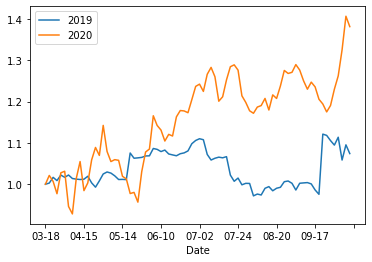

In [24]:
exdf.plot(x='Date',y=["2019","2020"] )

In [28]:
exdf.describe()

,2019,2020
count,80.000000,80.000000
mean,1.037078,1.154459
std,0.041791,0.109921
min,0.971799,0.928099
25%,1.003080,1.058687
50%,1.021164,1.178099
75%,1.072413,1.237156
max,1.121303,1.406717


In [25]:
adj_close_px19 = ndf19['Adj Close_x']
moving_avg19 = adj_close_px19.rolling(window=40).mean()
print(moving_avg19[-10:])

70    1156.449426
71    1153.448016
72    1154.795367
73    1156.119192
74    1157.149518
75    1157.735754
76    1158.798624
77    1158.179791
78    1158.103296
79    1157.212790
Name: Adj Close_x, dtype: float64


In [26]:
adj_close_px20 = ndf20['Adj Close_y']
moving_avg20 = adj_close_px20.rolling(window=40).mean()
print(moving_avg20[-10:])

70    1069.812495
71    1072.029997
72    1073.642497
73    1074.921248
74    1075.522498
75    1076.653748
76    1078.514996
77    1081.852496
78    1086.279999
79    1089.452499
Name: Adj Close_y, dtype: float64


In [29]:
ndf19['MA10'] = ndf19['Close_x'].rolling(10).mean()
ndf19['MA5'] = ndf19['Close_x'].rolling(5).mean()
ndf20['MA10'] = ndf20['Close_y'].rolling(10).mean()
ndf20['MA5'] = ndf20['Close_y'].rolling(5).mean()

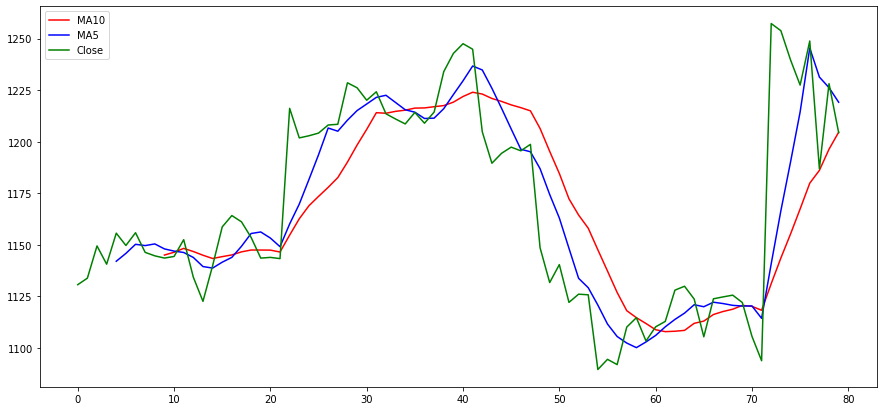

In [30]:
plt.figure(figsize=(15,7))
plt.plot(ndf19['MA10'], label='MA10', color='red')
ndf19['MA5'].plot(label='MA5', color='blue')
ndf19['Close_x'].plot(label='Close', color='green')
plt.legend(fontsize=10)
plt.show()

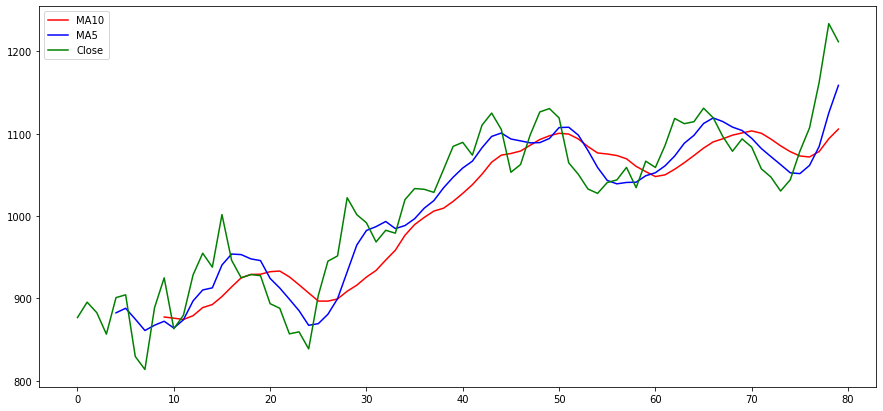

In [31]:
plt.figure(figsize=(15,7))
plt.plot(ndf20['MA10'], label='MA10', color='red')
ndf20['MA5'].plot(label='MA5', color='blue')
ndf20['Close_y'].plot(label='Close', color='green')
plt.legend(fontsize=10)
plt.show()